In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sympy import *

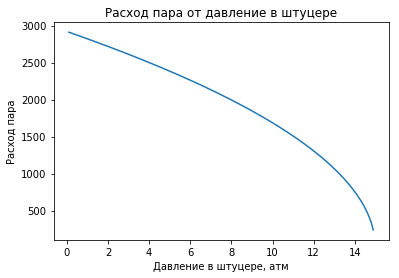

In [14]:
# w  =  расход пара, Ibm/hr lbm(фунт)=0,453592 кг
d0_mm=5  # диаметр отверстия
d1_mm=50 # диаметр трубы
dc_mm=10 # диаметр критического расходомера
C0 =2 # коэффициент разряда штуцера
Fa=0.072 # коэффициент теплового расширения отверстия для стали нужно умножить 7.2*10^(-6) на изменение температуры
Y2=0.4 # коэффициент расширения пара
p1_atm=15 # давление перед отверстием
p2_atm=10 # давление в отверстии
p_atm=10 # давление между критическим и докритическим расходомером
vfg_m3kg=57.8 # удельный объем пара
vf_m3kg=0.001# удельный объем жидкости
A=0.99998
B=1.38
a=37.037
b=0.345
k=1.3 # показатель адиабаты
X=100 #сухость пара
p2_atm_a = np.arange(0.1,15,0.1)
def w_kghr(d0_mm, p2_atm):
    d0_in=d0_mm/25.4 #дюймы
    d1_in=d1_mm/25.4
    dc_in=dc_mm/25.4
    beta=d0_in/d1_in
    f_atm=p1_atm-p2_atm  # падение давления в отверстии
    f_psi=f_atm*14.2233
    p_psi=p_atm*14.2233
    vfg=vfg_m3kg*16.01845
    vf=vf_m3kg*16.01845
    vexp_ft3lbm=A*vfg*(X/100)**B+vf #двухфазный уд. объем пара при прохождении через штуцер
    w_lbmhr=1888.56*C0*Fa*Y2*d1_in**2*(f_psi/vexp_ft3lbm)**0.5/(1-beta**4)**0.5
    w_kghr=w_lbmhr*0.453592
    return w_kghr
q=np.array([])
for pd in p2_atm_a:
    p1=w_kghr(d0_mm, pd)
    q=np.append(q,p1)
plt.plot(p2_atm_a,q)
plt.title('Расход пара от давления за штуцером')
plt.xlabel('Давление за штуцером, атм')
plt.ylabel('Расход параб кг/час')
plt.show()  

### Таблица для Y2 коэф теплового расширения насыщенного пара от давления в отверстии
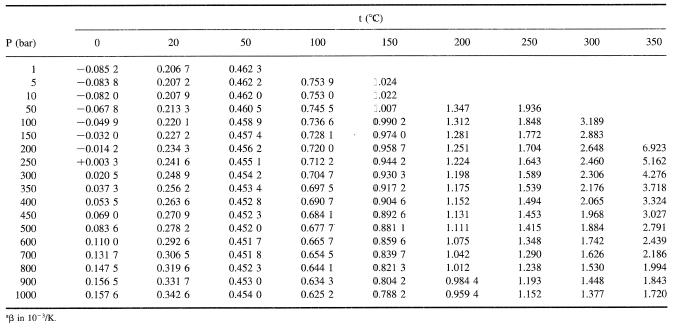

## Для Со
https://www.engineersedge.com/fluid_flow/discharge-air-orifice.htm
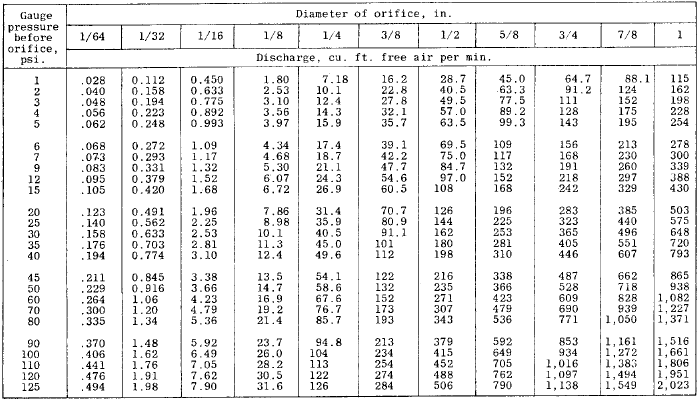
